# An example on financial analysis

## Creating/loading time series data

+ Author: Alexandre Manhães Savio
+ Date: 08/Jun/2015
+ Reference: https://github.com/twiecki/financial-analysis-python-tutorial.git

In [10]:
import datetime

import pandas as pd
import pandas.io.data
from pandas import Series, DataFrame
pd.__version__

'0.16.1'

In [65]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', figsize=(10, 8))
mpl.__version__

'1.4.3'

## Yahoo finance

In [12]:
[func for func in dir(pd.io.data) if func.startswith('get_')]

['get_components_yahoo',
 'get_data_famafrench',
 'get_data_fred',
 'get_data_google',
 'get_data_yahoo',
 'get_quote_google',
 'get_quote_yahoo']

In [13]:
from IPython.core.display import HTML
HTML("<iframe src=http://finance.yahoo.com/q?s=AAPL width=900 height=400></iframe>")

In [14]:
aapl = pd.io.data.get_data_yahoo('AAPL', 
                                 start=datetime.datetime(2006, 1, 1), 
                                 end=datetime.datetime(2015, 6, 8))
aapl.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-06-01,130.28,131.39,130.05000,130.53999,31956000,130.53999
2015-06-02,129.86,130.66,129.32001,129.96001,33556900,129.96001
2015-06-03,130.66,130.94,129.89999,130.12000,30889400,130.12000
2015-06-04,129.58,130.58,128.91000,129.36000,38229300,129.36000
2015-06-05,129.50,129.69,128.36000,128.64999,35314200,128.64999


### CSV files

In [15]:
aapl_filepath = 'Pandas_data/aapl_ohlc.csv'

aapl.to_csv(aapl_filepath)
!head $aapl_filepath

Date,Open,High,Low,Close,Volume,Adj Close
2006-01-03,72.38,74.74999,72.25001,74.74999,201808600,10.03073
2006-01-04,75.13002,75.98003,74.50001999999999,74.97,154900900,10.060260000000001
2006-01-05,74.83,74.9,73.74996999999999,74.37997,112355600,9.98108
2006-01-06,75.25,76.69998000000001,74.55,76.3,176114400,10.23873
2006-01-09,76.73001,77.19999,75.74,76.05003,168760200,10.20519
2006-01-10,76.25001999999999,81.88999,75.83001999999999,80.86001,569967300,10.85064
2006-01-11,83.83998000000001,84.80003,82.58999,83.89997,373448600,11.258569999999999
2006-01-12,84.96999,86.40002,83.61997,84.29001,320202400,11.31091
2006-01-13,84.99001,86.00998,84.59997,85.58998000000001,194076400,11.48536


In [16]:
df = pd.read_csv(aapl_filepath, index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,72.38000,74.74999,72.25001,74.74999,201808600,10.03073
2006-01-04,75.13002,75.98003,74.50002,74.97000,154900900,10.06026
2006-01-05,74.83000,74.90000,73.74997,74.37997,112355600,9.98108
2006-01-06,75.25000,76.69998,74.55000,76.30000,176114400,10.23873
2006-01-09,76.73001,77.19999,75.74000,76.05003,168760200,10.20519


In [17]:
df.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17', 
               ...
               '2015-05-22', '2015-05-26', '2015-05-27', '2015-05-28',
               '2015-05-29', '2015-06-01', '2015-06-02', '2015-06-03',
               '2015-06-04', '2015-06-05'],
              dtype='datetime64[ns]', name='Date', length=2372, freq=None, tz=None)

## See the data

In [18]:
ts = df['Close'][-10:]
ts

Date
2015-05-22    132.53999
2015-05-26    129.62000
2015-05-27    132.03999
2015-05-28    131.78000
2015-05-29    130.28000
2015-06-01    130.53999
2015-06-02    129.96001
2015-06-03    130.12000
2015-06-04    129.36000
2015-06-05    128.64999
Name: Close, dtype: float64

In [19]:
type(ts)

pandas.core.series.Series

In [20]:
date = ts.index[5]
date

Timestamp('2015-06-01 00:00:00')

In [21]:
ts[date]

130.53998999999999

In [22]:
ts[5]

130.53998999999999

In [23]:
# We can also select multiple columns.
df[['Open', 'Close']].head()

,Open,Close
Date,,
2006-01-03,72.38000,74.74999
2006-01-04,75.13002,74.97000
2006-01-05,74.83000,74.37997
2006-01-06,75.25000,76.30000
2006-01-09,76.73001,76.05003


In [24]:
# New columns can be added on the fly.
df['diff'] = df.Open - df.Close
df.head()

,Open,High,Low,Close,Volume,Adj Close,diff
Date,,,,,,,
2006-01-03,72.38000,74.74999,72.25001,74.74999,201808600,10.03073,-2.36999
2006-01-04,75.13002,75.98003,74.50002,74.97000,154900900,10.06026,0.16002
2006-01-05,74.83000,74.90000,73.74997,74.37997,112355600,9.98108,0.45003
2006-01-06,75.25000,76.69998,74.55000,76.30000,176114400,10.23873,-1.05000
2006-01-09,76.73001,77.19999,75.74000,76.05003,168760200,10.20519,0.67998


In [25]:
# ...and deleted on the fly.
del df['diff']
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,72.38000,74.74999,72.25001,74.74999,201808600,10.03073
2006-01-04,75.13002,75.98003,74.50002,74.97000,154900900,10.06026
2006-01-05,74.83000,74.90000,73.74997,74.37997,112355600,9.98108
2006-01-06,75.25000,76.69998,74.55000,76.30000,176114400,10.23873
2006-01-09,76.73001,77.19999,75.74000,76.05003,168760200,10.20519


Common Financial Computations
-----------------------------

* Moving Average
* Returns

In [26]:
close_px = df['Adj Close']

In [27]:
mavg = pd.rolling_mean(close_px, window=40)
mavg[-10:]

Date
2015-05-22    127.097242
2015-05-26    127.269309
2015-05-27    127.424200
2015-05-28    127.620890
2015-05-29    127.784561
2015-06-01    127.928093
2015-06-02    128.006586
2015-06-03    128.122440
2015-06-04    128.229502
2015-06-05    128.294913
dtype: float64

In [28]:
pd.rolling_mean?

Returns is defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [30]:
rets = close_px / close_px.shift(1) - 1
rets.head()

Date
2006-01-03         NaN
2006-01-04    0.002944
2006-01-05   -0.007871
2006-01-06    0.025814
2006-01-09   -0.003276
Name: Adj Close, dtype: float64

In [31]:
close_px.shift?

Or alternatively `.pct_change()`.

In [32]:
close_px.pct_change().head()

Date
2006-01-03         NaN
2006-01-04    0.002944
2006-01-05   -0.007871
2006-01-06    0.025814
2006-01-09   -0.003276
Name: Adj Close, dtype: float64

## Plotting Basics

Series and DataFrames have an associated `.plot()` command (uses Matplotlib behind the scenes).

In [40]:
plt.style.available


['bmh', 'dark_background', 'grayscale', 'fivethirtyeight', 'ggplot']

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

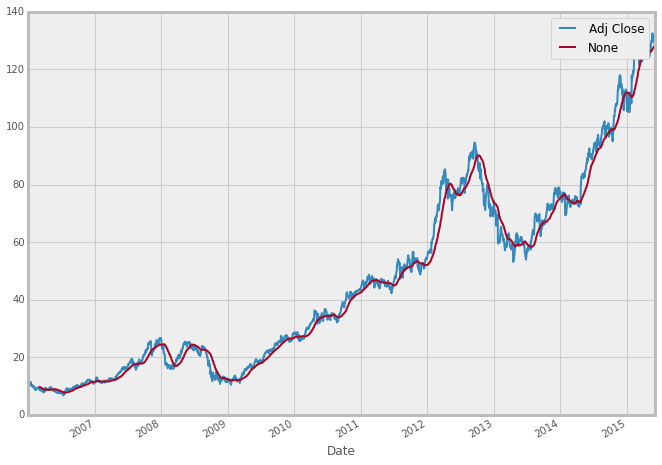

In [66]:
close_px.plot(label='AAPL') #the close values
mavg    .plot(label='mavg') # the rolling average
plt.legend()

## We should diversify our investment

In [50]:
df = pd.io.data.get_data_yahoo(['AAPL', 'GE', 'GOOG', 'IBM', 'KO', 'MSFT', 'PEP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end  =datetime.datetime(2015, 6, 8))['Adj Close']
df.tail()

,AAPL,GE,GOOG,IBM,KO,MSFT,PEP
Date,,,,,,,
2015-06-01,130.53999,27.28,533.98999,170.17999,40.94,47.23,95.26759
2015-06-02,129.96001,27.33,539.17999,169.64999,40.99,46.92,95.34700
2015-06-03,130.12000,27.53,540.31000,169.92000,40.87,46.85,95.30000
2015-06-04,129.36000,27.26,536.70001,168.38000,40.59,46.36,94.14000
2015-06-05,128.64999,27.29,533.33002,167.39999,40.10,46.14,93.05000


In [53]:
rets = df.pct_change()
rets.tail()

,AAPL,GE,GOOG,IBM,KO,MSFT,PEP
Date,,,,,,,
2015-06-01,0.001996,0.000367,0.003533,0.003124,-0.000488,0.007896,-0.004770
2015-06-02,-0.004443,0.001833,0.009719,-0.003114,0.001221,-0.006564,0.000834
2015-06-03,0.001231,0.007318,0.002096,0.001592,-0.002928,-0.001492,-0.000493
2015-06-04,-0.005841,-0.009807,-0.006681,-0.009063,-0.006851,-0.010459,-0.012172
2015-06-05,-0.005489,0.001101,-0.006279,-0.005820,-0.012072,-0.004745,-0.011579


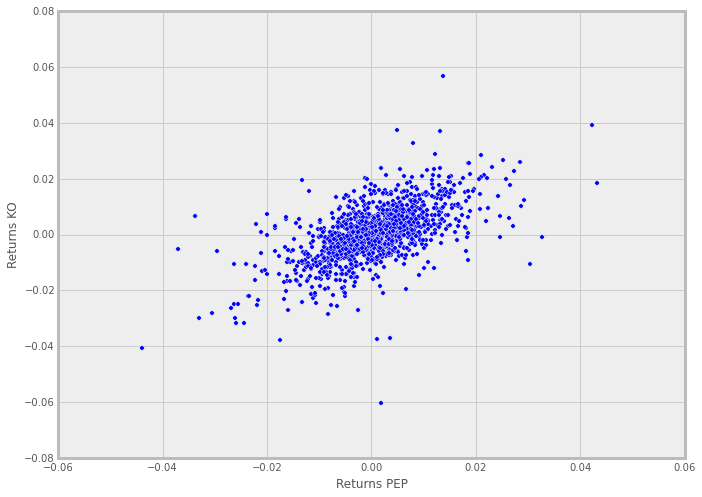

In [67]:
plt.scatter(rets.PEP, rets.KO)
plt.xlabel('Returns PEP')
plt.ylabel('Returns KO')

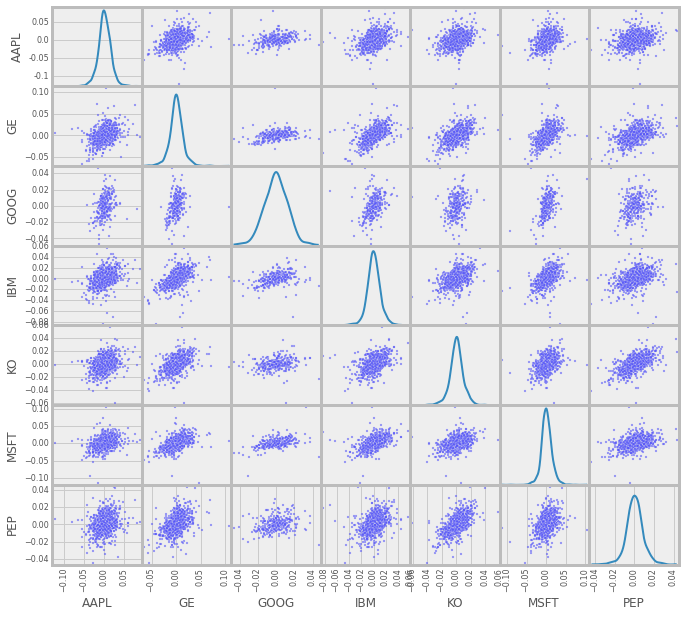

In [68]:
pd.scatter_matrix(rets, diagonal='kde', figsize=(10, 10));

In [57]:
corr = rets.corr()
corr

,AAPL,GE,GOOG,IBM,KO,MSFT,PEP
AAPL,1.000000,0.369103,0.308886,0.377110,0.285081,0.346493,0.244585
GE,0.369103,1.000000,0.312821,0.525635,0.486642,0.459220,0.462882
GOOG,0.308886,0.312821,1.000000,0.345190,0.200223,0.457047,0.240308
IBM,0.377110,0.525635,0.345190,1.000000,0.455980,0.497075,0.394091
KO,0.285081,0.486642,0.200223,0.455980,1.000000,0.390354,0.606698
MSFT,0.346493,0.459220,0.457047,0.497075,0.390354,1.000000,0.392465
PEP,0.244585,0.462882,0.240308,0.394091,0.606698,0.392465,1.000000


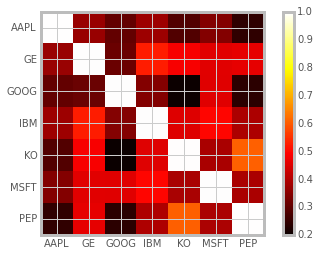

In [58]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

One thing we are often interested in is the relationship of expected returns and the risk we are taking one. Often there is a trade-off between the two.

Here we use `plt.annotate` to put labels on the scatterplot.

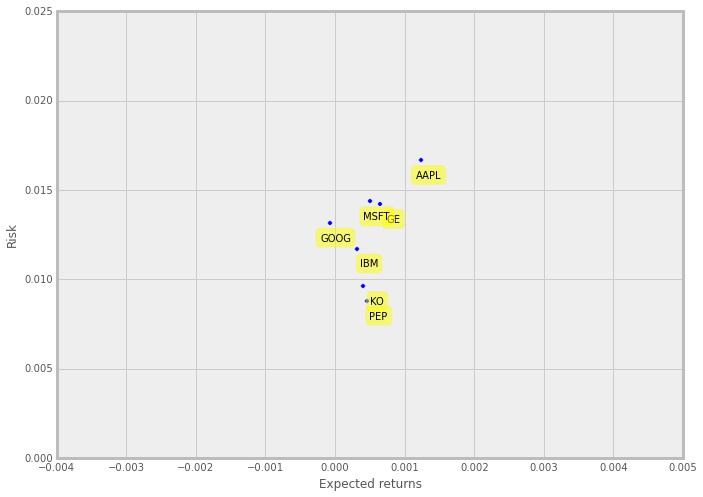

In [69]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Data alignment and dealing with missing values
==============

* Join, merge, concatenate
* Filling NaNs

In [80]:
# Lets pull some more securities from Yahoo finance and build a DataFrame of the adjusted closing prices.
series_list = []
securities = ['AAPL', 'IBM', 'MSFT']
for security in securities:
    s = pd.io.data.get_data_yahoo(security, start=datetime.datetime(2011, 10, 1), end=datetime.datetime(2013, 1, 1))['Adj Close']
    s.name = security # Rename series to match security name
    series_list.append(s)

In [81]:
# pd.concat can be used to concatenate multiple Series into one DataFrame.
df = pd.concat(series_list, axis=1)
df.head()

,AAPL,IBM,MSFT
Date,,,
2011-10-03,50.26773,160.21576,22.06765
2011-10-04,49.98593,161.55637,22.79634
2011-10-05,50.75752,163.50718,23.29113
2011-10-06,50.63944,167.98201,23.69596
2011-10-07,49.62362,168.62920,23.61499


In [83]:
# let's add some nans
import numpy as np

df.ix[0, 'AAPL'] = np.nan
df.ix[1, ['IBM']] = np.nan
df.ix[[1, 2, 3], 'MSFT'] = np.nan

df.head()

,AAPL,IBM,MSFT
Date,,,
2011-10-03,NaN,160.21576,22.06765
2011-10-04,49.98593,NaN,NaN
2011-10-05,50.75752,163.50718,NaN
2011-10-06,50.63944,167.98201,NaN
2011-10-07,49.62362,168.62920,23.61499


Pandas has great support for computing with missing values.

In [84]:
(df.AAPL + df.IBM).head()

Date
2011-10-03          NaN
2011-10-04          NaN
2011-10-05    214.26470
2011-10-06    218.62145
2011-10-07    218.25282
dtype: float64

One common approach to impute missing values in time series is forward filling.


In [85]:
df.ffill().head()

,AAPL,IBM,MSFT
Date,,,
2011-10-03,NaN,160.21576,22.06765
2011-10-04,49.98593,160.21576,22.06765
2011-10-05,50.75752,163.50718,22.06765
2011-10-06,50.63944,167.98201,22.06765
2011-10-07,49.62362,168.62920,23.61499
